In [ ]:
# 📦 Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Baca file CSV
df = pd.read_csv("disney_movies.csv")

In [ ]:
# Menampilkan 5 data teratas dan info kolom
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB
None


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [ ]:
# 📌 Tampilkan beberapa baris awal
print("=== Data Awal ===")
print(df[['movie_title', 'genre', 'mpaa_rating', 'inflation_adjusted_gross']].head())

=== Data Awal ===
                       movie_title      genre mpaa_rating  \
0  Snow White and the Seven Dwarfs    Musical           G   
1                        Pinocchio  Adventure           G   
2                         Fantasia    Musical           G   
3                Song of the South  Adventure           G   
4                       Cinderella      Drama           G   

   inflation_adjusted_gross  
0                5228953251  
1                2188229052  
2                2187090808  
3                1078510579  
4                 920608730  


In [ ]:
df.isnull().sum()

,0
movie_title,0
release_date,0
genre,17
mpaa_rating,56
total_gross,0
inflation_adjusted_gross,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
movie_title,0
release_date,0
genre,0
mpaa_rating,0
total_gross,0
inflation_adjusted_gross,0


In [ ]:
jumlah_kategori = df['genre'].nunique()

In [ ]:
print(jumlah_kategori)

jumlah_rating = df['mpaa_rating'].nunique()
print(jumlah_rating)

12
5


# Clustering Genre dan Rating

         Number of Films Dominant Genre Dominant MPAA Rating
cluster                                                     
0                     53          Drama                   PG
1                    182         Comedy                   PG
2                    129         Action                PG-13
3                    129      Adventure                   PG
4                     86          Drama                PG-13


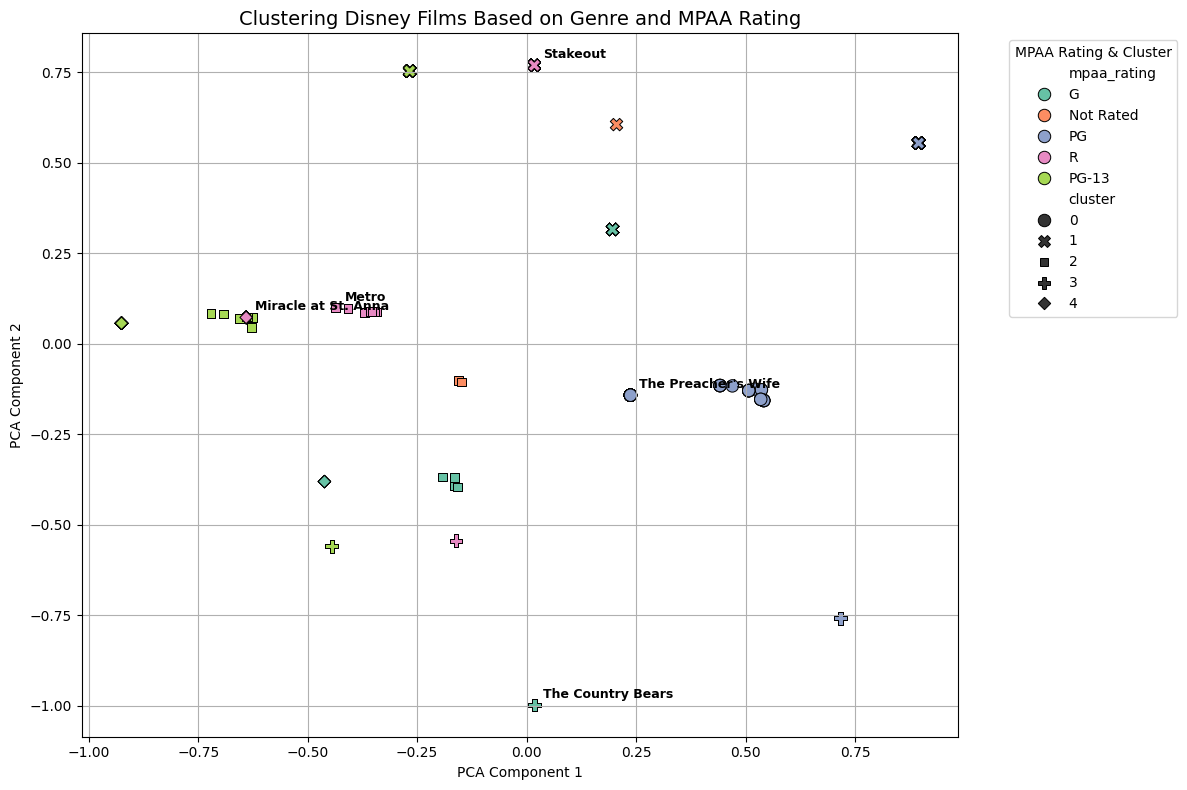

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Simpan df asli - no need to copy here, work directly on df after cleaning
# df_clean = df[['movie_title', 'genre', 'mpaa_rating']].copy() # Remove this line

# Assume df has already been loaded and dropna() has been applied as in the previous cells.
# If not, make sure df has missing values dropped before this point.

# Bersihkan spasi di kolom yang relevan
df['genre'] = df['genre'].str.strip()
df['mpaa_rating'] = df['mpaa_rating'].str.strip()

# One-hot encoding on the relevant columns of the original df
# Handle potential NaNs before one-hot encoding if they weren't dropped earlier
# Since you've already run df.dropna() earlier, this should be fine.
encoded_df = pd.get_dummies(df[['genre', 'mpaa_rating']])

# Ensure the index of encoded_df matches the index of df
# This is crucial if df.dropna() created gaps in the index
encoded_df = encoded_df.reindex(df.index).fillna(0) # Use fillna(0) for one-hot encoded columns

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(encoded_df)

# Reduksi dimensi
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(encoded_df)

# Assign the PCA results to the original df, ensuring index alignment
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

# Info cluster dominan
# Use df directly since the 'cluster' column is now added to it
cluster_info = df.groupby('cluster').agg({
    'movie_title': 'count',
    # Change 'Genre' to 'genre' and 'MPAA Rating' to 'mpaa_rating'
    'genre': lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A', # Add check for empty mode
    'mpaa_rating': lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A' # Add check for empty mode
}).rename(columns={'movie_title': 'Number of Films', 'genre': 'Dominant Genre', 'mpaa_rating': 'Dominant MPAA Rating'}) # Optionally rename columns for clarity

print(cluster_info)

# Plot PCA clustering
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='pca1', y='pca2',
    hue='mpaa_rating',
    style='cluster',
    data=df,
    palette='Set2',
    s=80,
    edgecolor='k'
)

# Tambahkan nama film acak sebagai label di setiap cluster
for cluster_id in df['cluster'].unique():
    sample = df[df['cluster'] == cluster_id].sample(1, random_state=42)
    x = sample['pca1'].values[0]
    y = sample['pca2'].values[0]
    label = f"{sample['movie_title'].values[0]}"
    plt.text(x + 0.02, y + 0.02, label, fontsize=9, fontweight='bold')

# Judul dan label
plt.title("Clustering Disney Films Based on Genre and MPAA Rating", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='MPAA Rating & Cluster', loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 🔍 Lihat struktur data
print("🔎 Info Data:")
print(df.info())
print("\n🧼 Jumlah nilai kosong:")
print(df.isnull().sum())
print("\n📊 Contoh data:")
print(df[['movie_title', 'genre', 'inflation_adjusted_gross']].head())

🔎 Info Data:
<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 578
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_title               513 non-null    object 
 1   release_date              513 non-null    object 
 2   genre                     513 non-null    object 
 3   mpaa_rating               513 non-null    object 
 4   total_gross               513 non-null    int64  
 5   inflation_adjusted_gross  513 non-null    int64  
 6   cluster                   513 non-null    int32  
 7   pca1                      513 non-null    float64
 8   pca2                      513 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 38.1+ KB
None

🧼 Jumlah nilai kosong:
movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
c

In [ ]:
print(df.columns.tolist())


['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross', 'inflation_adjusted_gross', 'cluster', 'pca1', 'pca2']


In [ ]:
# Ambil kolom yang dibutuhkan
df_income = df[['movie_title', 'genre', 'inflation_adjusted_gross']].copy()

# Bersihkan data
df_income['genre'] = df_income['genre'].str.strip()
df_income.dropna(subset=['genre', 'inflation_adjusted_gross'], inplace=True)

# One-hot encoding untuk genre
genre_encoded = pd.get_dummies(df_income['genre'])

# Gabungkan dengan pendapatan
X_income = pd.concat([genre_encoded, df_income[['inflation_adjusted_gross']].reset_index(drop=True)], axis=1)

# Hapus NaN jika masih ada
X_income.dropna(inplace=True)

In [ ]:
# Reset index keduanya agar baris sama persis
df_income.reset_index(drop=True, inplace=True)
X_income.reset_index(drop=True, inplace=True)

# Hapus baris dari df_income yang sama dengan baris yang dihapus dari X_income
df_income = df_income.loc[X_income.index]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_income)

# Clustering
kmeans2 = KMeans(n_clusters=3, random_state=42)
df_income['cluster'] = kmeans2.fit_predict(X_scaled)

In [ ]:

# STEP 4: Preprocessing
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False), ['genre', 'mpaa_rating']),
    ('num', StandardScaler(), ['inflation_adjusted_gross'])
])

In [ ]:
# STEP 3: Pilih kolom yang dibutuhkan dan hapus baris kosong
df_clean = df[['genre', 'mpaa_rating', 'inflation_adjusted_gross']].dropna()


In [ ]:
X = preprocessor.fit_transform(df_clean)

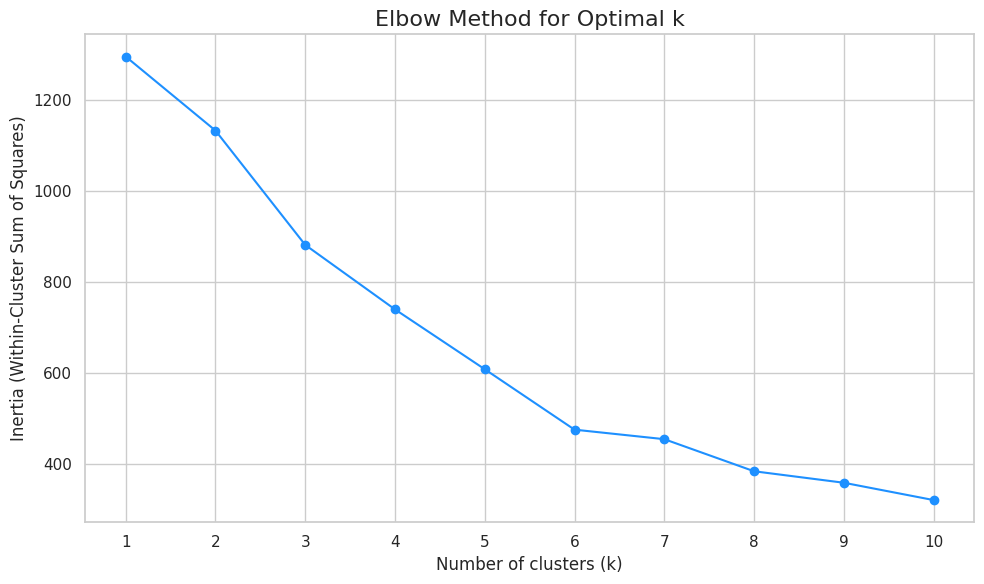

In [ ]:
# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.plot(K, inertia, marker='o', linestyle='-', color='dodgerblue')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()


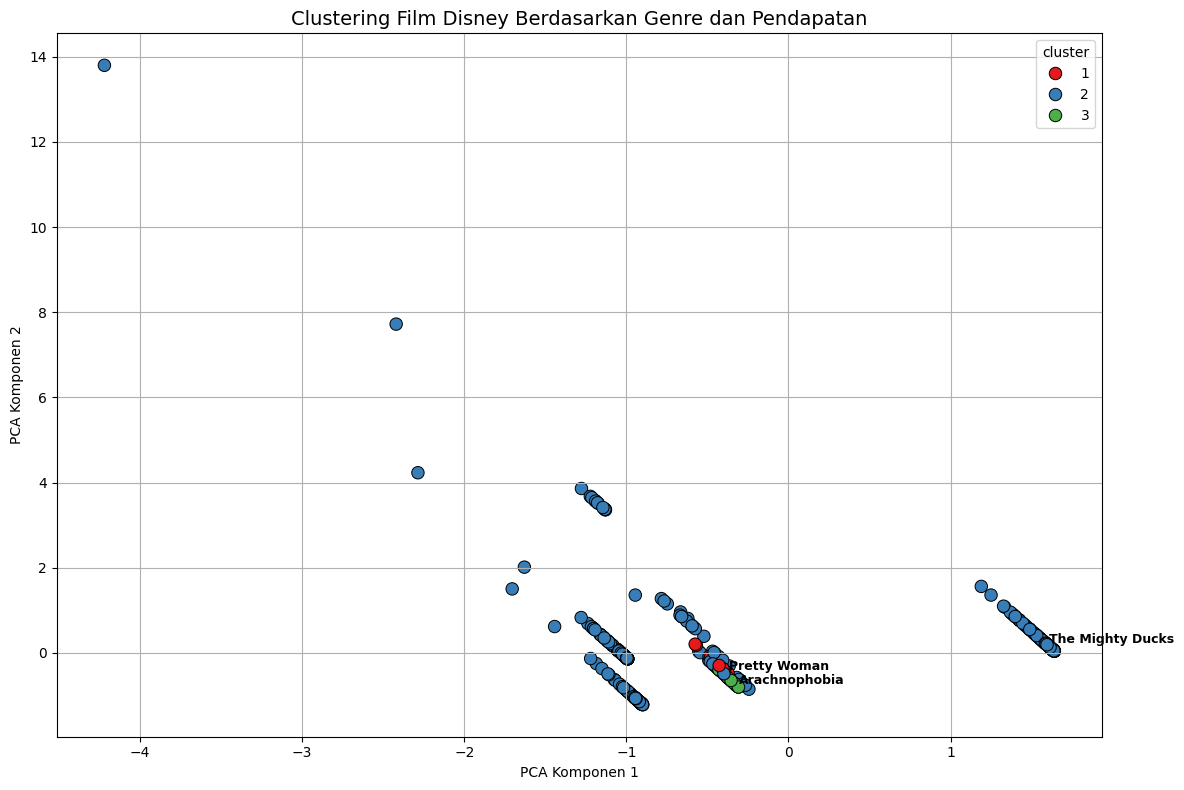

In [ ]:
# PCA untuk visualisasi
pca2 = PCA(n_components=2, random_state=42)
reduced2 = pca2.fit_transform(X_scaled)
df_income['pca1'] = reduced2[:, 0]
df_income['pca2'] = reduced2[:, 1]

# 📊 Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster',
    palette='Set1',
    data=df_income,
    s=80,
    edgecolor='k'
)

df_income['cluster_label'] = 'Cluster ' + df_income['cluster'].astype(str)


# Tambahkan 1 film contoh dari tiap cluster sebagai label
for cluster_id in df_income['cluster'].unique():
    sample = df_income[df_income['cluster'] == cluster_id].sample(1, random_state=42)
    x = sample['pca1'].values[0]
    y = sample['pca2'].values[0]
    label = sample['movie_title'].values[0]
    plt.text(x + 0.02, y + 0.02, label, fontsize=9, fontweight='bold')

# Tampilan akhir
plt.title("Clustering Film Disney Berdasarkan Genre dan Pendapatan", fontsize=14)
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Ubah label cluster dari 0,1,2 menjadi 1,2,3
df_income['cluster'] = df_income['cluster'] + 1


In [ ]:
# Analisis masing-masing cluster
summary = df_income.groupby('cluster').agg({
    'movie_title': 'count',
    'inflation_adjusted_gross': ['mean', 'min', 'max'],
    'genre': lambda x: x.mode().iloc[0]
})

# Rename hasil kolom multi-index
summary.columns = ['jumlah_film', 'rata2_pendapatan', 'pendapatan_terendah', 'pendapatan_tertinggi', 'genre_dominan']
summary = summary.reset_index()

# Tampilkan ringkasan
print("📋 Ringkasan cluster berdasarkan genre dan pendapatan:")
display(summary)

📋 Ringkasan cluster berdasarkan genre dan pendapatan:


,cluster,jumlah_film,rata2_pendapatan,pendapatan_terendah,pendapatan_tertinggi,genre_dominan
0,1,21,7.927287e+07,907414,356389765,Romantic Comedy
1,2,405,1.245730e+08,2984,5228953251,Comedy
2,3,21,9.646407e+07,3957025,485424724,Thriller/Suspense


In [ ]:
# Urutkan berdasarkan rata-rata pendapatan
summary_sorted = summary.sort_values('rata2_pendapatan', ascending=False).reset_index(drop=True)

# Buat dictionary mapping: cluster lama → cluster baru (1, 2, 3)
label_mapping = {old: new for new, old in enumerate(summary_sorted['cluster'], start=1)}

# Tampilkan mapping-nya (untuk pengecekan)
print("Label Mapping:", label_mapping)

df_income['cluster'] = df_income['cluster'].map(label_mapping)


Label Mapping: {3: 1, 4: 2, 2: 3}


In [ ]:
summary = df_income.groupby('cluster').agg(
    jumlah_film=('movie_title', 'count'),
    rata2_pendapatan=('inflation_adjusted_gross', 'mean'),
    pendapatan_min=('inflation_adjusted_gross', 'min'),
    pendapatan_max=('inflation_adjusted_gross', 'max'),
    genre_dominan=('genre', lambda x: x.mode().iloc[0])
).reset_index()


In [ ]:
def format_rupiah(x):
    return f"${x:,.0f}"

print("📄 Narasi Hasil Clustering Berdasarkan Genre dan Pendapatan:\n")

# Urutkan dari pendapatan tertinggi
summary = summary.sort_values('rata2_pendapatan', ascending=False).reset_index(drop=True)

for i, row in summary.iterrows():
    cluster_id = row['cluster']
    genre = row['genre_dominan']
    count = row['jumlah_film']
    avg_income = format_rupiah(row['rata2_pendapatan'])
    min_income = format_rupiah(row['pendapatan_min'])
    max_income = format_rupiah(row['pendapatan_max'])

    posisi = "tertinggi" if i == 0 else ("sedang" if i == 1 else "terendah")

    print(f"🟢 Cluster {cluster_id} merupakan kelompok dengan pendapatan {posisi}.")
    print(f"   • Genre dominan: {genre}")
    print(f"   • Jumlah film: {count} film")
    print(f"   • Rata-rata pendapatan: {avg_income}")
    print(f"   • Rentang pendapatan: {min_income} s.d. {max_income}\n")


📄 Narasi Hasil Clustering Berdasarkan Genre dan Pendapatan:

🟢 Cluster 1 merupakan kelompok dengan pendapatan tertinggi.
   • Genre dominan: Comedy
   • Jumlah film: 405 film
   • Rata-rata pendapatan: $124,573,028
   • Rentang pendapatan: $2,984 s.d. $5,228,953,251

🟢 Cluster 2 merupakan kelompok dengan pendapatan sedang.
   • Genre dominan: Thriller/Suspense
   • Jumlah film: 21 film
   • Rata-rata pendapatan: $96,464,069
   • Rentang pendapatan: $3,957,025 s.d. $485,424,724

🟢 Cluster 3 merupakan kelompok dengan pendapatan terendah.
   • Genre dominan: Romantic Comedy
   • Jumlah film: 21 film
   • Rata-rata pendapatan: $79,272,868
   • Rentang pendapatan: $907,414 s.d. $356,389,765

